# Tsagaan Sar Loan Analysis

This notebook hopes to answer a single question: Do personal loans increase in a measureable way prior to Tsagaan Sar?

This question is based on wide reporting in the Mongolian press that Tsagaan Sar places a high monetary burden on the elderly. A few links:

- http://bloombergtv.mn/%D0%B8%D1%80%D0%B3%D1%8D%D0%B4%D0%B8%D0%B9%D0%BD-62-%D1%85%D1%83%D0%B2%D1%8C-%D0%BD%D1%8C-%D0%B7%D1%8D%D1%8D%D0%BB%D1%8D%D1%8D%D1%80-%D1%86%D0%B0%D0%B3%D0%B0%D0%B0%D0%BD-%D1%81%D0%B0%D1%80-%D1%82%D1%8D%D0%BC%D0%B4%D1%8D%D0%B3%D0%BB%D1%8D%D0%B6-357-%D1%82%D1%8D%D1%80%D0%B1%D1%83%D0%BC-%D1%82%D3%A9%D0%B3%D1%80%D3%A9%D0%B3%D0%B8%D0%B9%D0%B3-%D0%B8%D0%BC%D0%BF%D0%BE%D1%80%D1%82%D1%8B%D0%BD-%D0%B1%D1%8D%D0%BB%D1%8D%D0%B3%D1%82-%D0%B7%D0%B0%D1%80%D1%86%D1%83%D1%83%D0%BB%D0%B6-%D0%B1%D0%B0%D0%B9%D0%BD%D0%B0/
- http://dnn.mn/%D1%86%D0%B0%D0%B3%D0%B0%D0%B0%D0%BD-%D1%81%D0%B0%D1%80-%D0%B1%D0%B0-%D1%86%D0%B0%D0%BB%D0%B8%D0%BD-%D1%82%D1%8D%D1%82%D0%B3%D1%8D%D0%B2%D1%8D%D1%80%D0%B8%D0%B9%D0%BD-%D0%B7%D1%8D%D1%8D%D0%BB/
- https://news.mn/r/770526/
= http://mongolnews.mn/mo

In [27]:
#Import required libraries
import pandas as pd
from fbprophet import Prophet 

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('/storage/mds.mplstyle')

We can load our dataset from the CSV file, which was collected from MongolBank's Statistical Database here: https://www.mongolbank.mn/eng/dbliststatistic.aspx?id=02

We will rename the columns to simplify the selection later.

In [28]:
df = pd.read_csv('data/loans.csv', header=0, names=['date','salary','pension'])

In [29]:
df.head(10)

,date,salary,pension
0,12/31/2008,37547.56092,43616.02673
1,3/31/2009,30640.04101,55241.52788
2,6/30/2009,43947.97785,46022.47222
3,9/30/2009,76677.81398,52476.63136
4,12/31/2009,51307.13591,43371.51284
5,3/31/2010,58950.04688,52612.07351
6,6/30/2010,92872.42111,46837.86520
7,9/30/2010,116903.32770,50185.77887
8,12/31/2010,111685.94790,62613.92135
9,3/31/2011,208644.84980,82509.17204


In [30]:
df.dtypes

date        object
salary     float64
pension    float64
dtype: object

In [31]:
df['date'] = pd.to_datetime(df['date'])

Our dataset has a quarterly time frequency. The original data gave roman numerals (I, II, III, IV) to denote the quarter. This was changed in PowerQuery to be the end date of each quarter. This will allow dates to be correctly positioned on charts and for Prophet.

As we will be using Prophet for this analysis, we will separate our two features, Salary Loans and Pension Loans, into two separate dataframes. This is because Prophet only allows one date and one value column for analysis. 

In [32]:
salary = df[['date','salary']].rename(columns={'date':'ds','salary':'y'})
pension = df[['date','pension']].rename(columns={'date':'ds','pension':'y'})

In [33]:
salary.head()

,ds,y
0,2008-12-31,37547.56092
1,2009-03-31,30640.04101
2,2009-06-30,43947.97785
3,2009-09-30,76677.81398
4,2009-12-31,51307.13591


## Fitting Prophet models

We can now fit prophet models to each dataset. 

Check yearly periods (2008

#### Salary Loans

In [58]:
m = Prophet(yearly_seasonality=5, weekly_seasonality=False)
m.add_seasonality(name='quarterly', period=30.5, fourier_order=5)
m.fit(salary)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future = m.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
43,2019-09-30
44,2019-12-31
45,2020-03-31
46,2020-06-30
47,2020-09-30


In [60]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-09-30,9.837615e+05,919292.652565,1.047163e+06
44,2019-12-31,8.120212e+05,745958.242615,8.778670e+05
45,2020-03-31,9.800268e+05,913565.590144,1.046055e+06
46,2020-06-30,1.050386e+06,983327.466221,1.117128e+06
47,2020-09-30,1.056128e+06,990927.715905,1.123513e+06


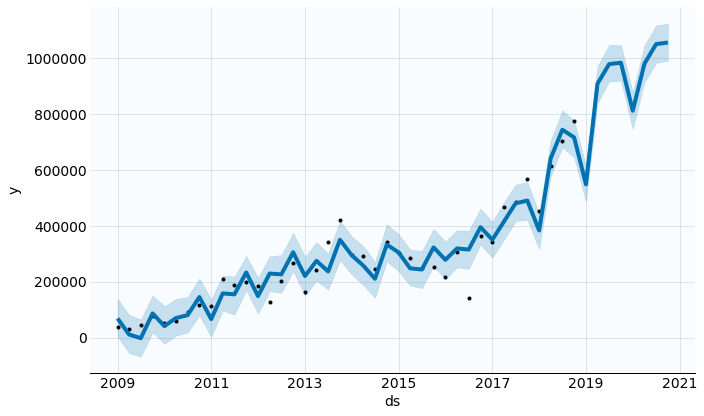

In [61]:
fig1 = m.plot(forecast)

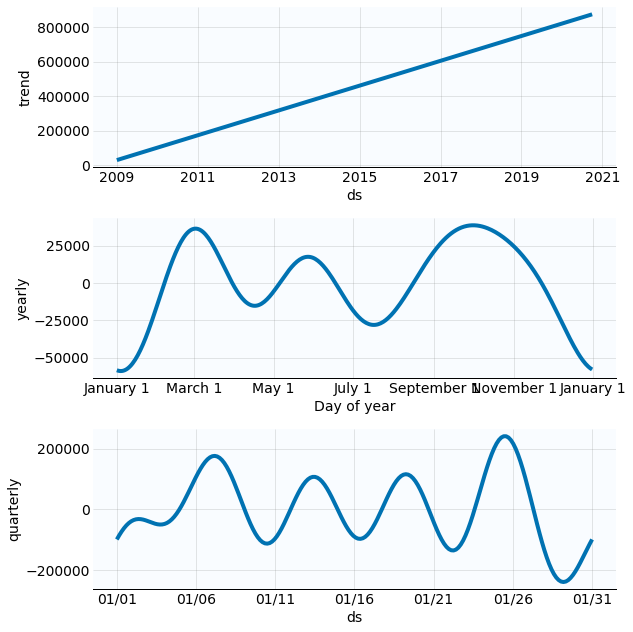

In [62]:
fig2 = m.plot_components(forecast)

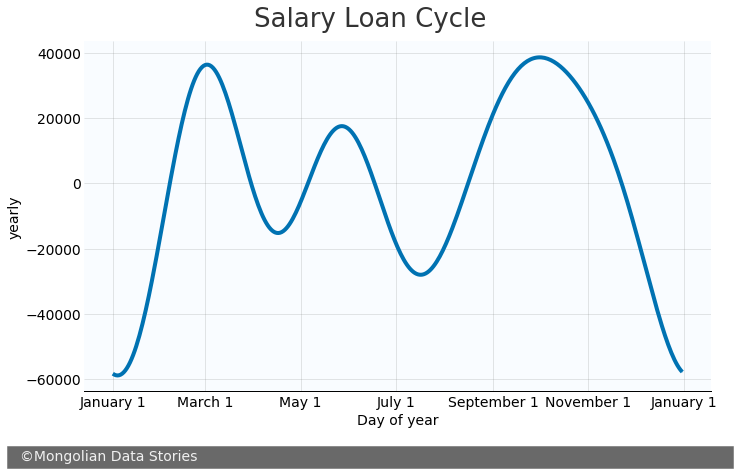

In [74]:
from fbprophet.plot import plot_yearly
a = plot_yearly(m)
plt.text(x = 736420, y = 48000, s = 'Salary Loan Cycle', fontsize=26, alpha=.8)
#plt.text(x = 736265, y = -85000, s = '  ©Mongolian Data Stories                                                                                                                      ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('output/salary-cycle.png', dpi = 300, bbox_inches="tight")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


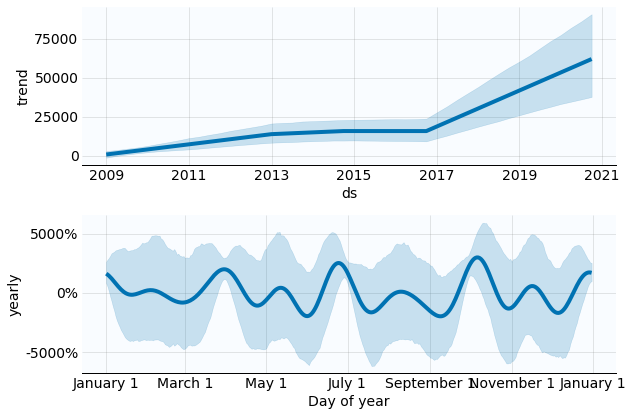

In [40]:
m = Prophet(seasonality_mode='multiplicative', n_changepoints=4, mcmc_samples=300).fit(salary)
fcst = m.predict(future)
fig = m.plot_components(fcst)

#### Pension Loans

In [83]:
m = Prophet(yearly_seasonality=4)
m.add_seasonality(name='quarterly', period=30.5, fourier_order=5)
m.fit(pension)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
future = m.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
43,2019-09-30
44,2019-12-31
45,2020-03-31
46,2020-06-30
47,2020-09-30


In [85]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-09-30,317392.123674,287265.687879,344651.000733
44,2019-12-31,300924.641542,272510.587508,330779.063492
45,2020-03-31,353512.751349,324308.310851,383589.798779
46,2020-06-30,335064.208276,303968.941353,363410.594448
47,2020-09-30,345001.417676,315993.997558,375104.474473


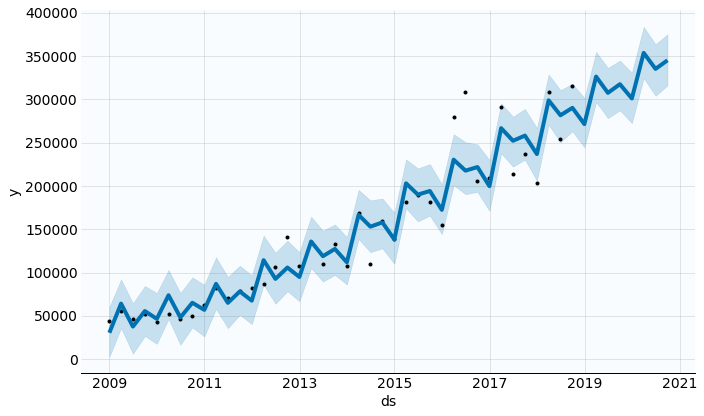

In [86]:
fig1 = m.plot(forecast)

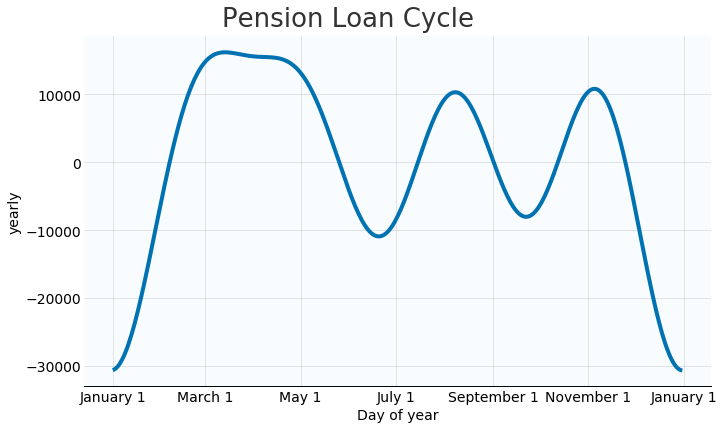

In [91]:
from fbprophet.plot import plot_yearly
b = plot_yearly(m)
plt.text(x = 736400, y = 20000, s = 'Pension Loan Cycle', fontsize=26, alpha=.8)
#plt.text(x = 736265, y = -40000, s = '  ©Mongolian Data Stories                                                                                                                      ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('output/pension-cycle.png', dpi = 300, bbox_inches="tight")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


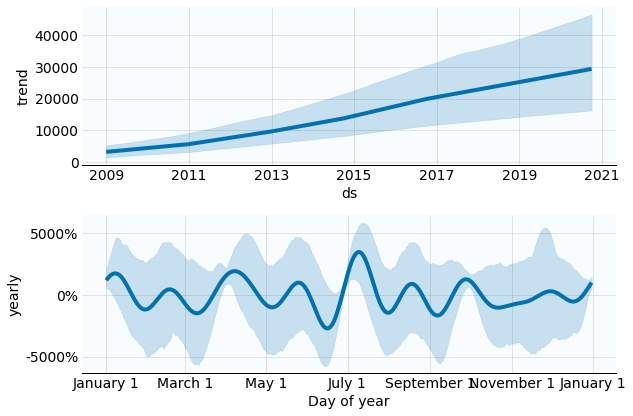

In [81]:
m = Prophet(seasonality_mode='multiplicative', n_changepoints=4, mcmc_samples=300).fit(pension)
fcst = m.predict(future)
fig = m.plot_components(fcst)

## Graphic Creation

In [47]:
df.head()

,date,salary,pension
0,2008-12-31,37547.56092,43616.02673
1,2009-03-31,30640.04101,55241.52788
2,2009-06-30,43947.97785,46022.47222
3,2009-09-30,76677.81398,52476.63136
4,2009-12-31,51307.13591,43371.51284


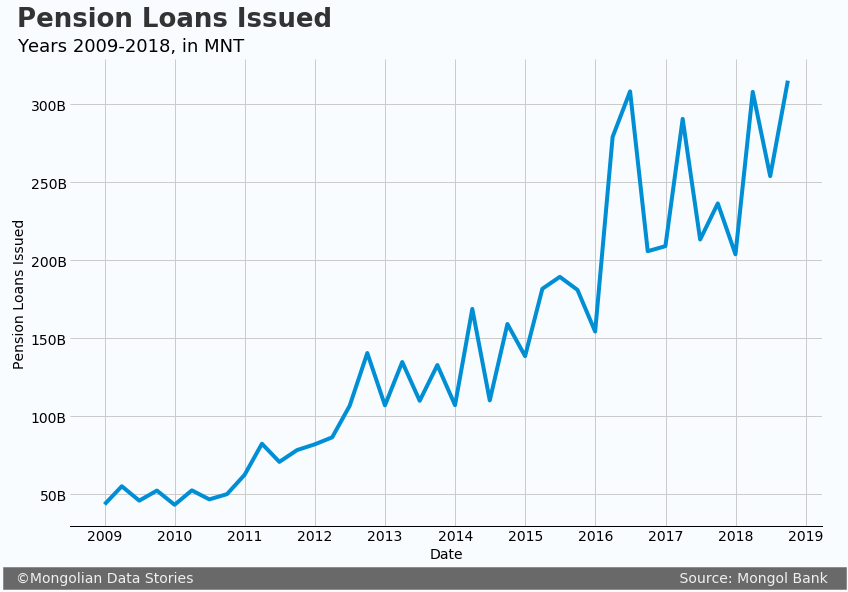

In [48]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['pension'])
ax.set_xlabel('Date')
ax.set_ylabel('Pension Loans Issued')
ax.set_yticklabels(['0','50B','100B', '150B', '200B', '250B', '300B'])
ax.text(x = 732950, y = 350000, s = 'Pension Loans Issued', fontsize=26, weight='bold', alpha=.8)
ax.text(x = 732950, y = 334000, s= 'Years 2009-2018, in MNT', fontsize=18)
ax.text(x = 732900, y = -6000, s = '  ©Mongolian Data Stories                                                                                                            Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('output/pension-loans.png', dpi = 300, bbox_inches="tight")

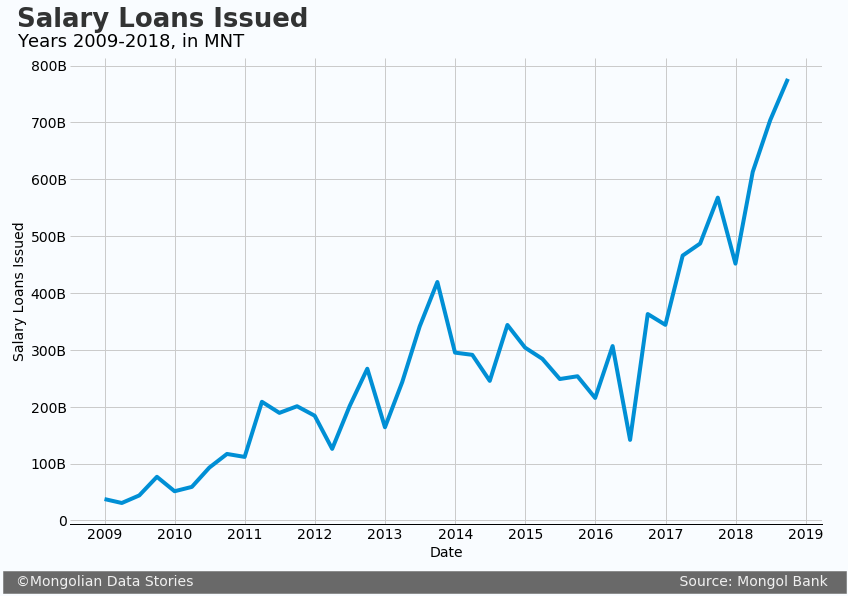

In [49]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['salary'])
ax.set_xlabel('Date')
ax.set_ylabel('Salary Loans Issued')
ax.set_yticklabels(['0','0','100B','200B', '300B', '400B', '500B', '600B', '700B', '800B'])
ax.text(x = 732950, y = 868000, s = 'Salary Loans Issued', fontsize=26, weight='bold', alpha=.8)
ax.text(x = 732950, y = 834000, s= 'Years 2009-2018, in MNT', fontsize=18)
ax.text(x = 732900, y = -115000, s = '  ©Mongolian Data Stories                                                                                                            Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('output/salary-loans.png', dpi = 300, bbox_inches="tight")

## Checking Different Time Periods

In [50]:
pension1 = pension[pension['ds'] >= '01-01-2013']

In [51]:
m = Prophet(yearly_seasonality=4)
m.add_seasonality(name='quarterly', period=30.5, fourier_order=5)
m.fit(pension1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.


In [52]:
future = m.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
26,2019-09-30
27,2019-12-31
28,2020-03-31
29,2020-06-30
30,2020-09-30


In [53]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26,2019-09-30,310817.657981,276267.454037,341534.225665
27,2019-12-31,289796.953643,257844.633922,323129.004694
28,2020-03-31,366758.740316,336042.553205,397631.374623
29,2020-06-30,332204.655564,301233.228381,362852.461658
30,2020-09-30,343443.877502,310225.397358,374545.321868


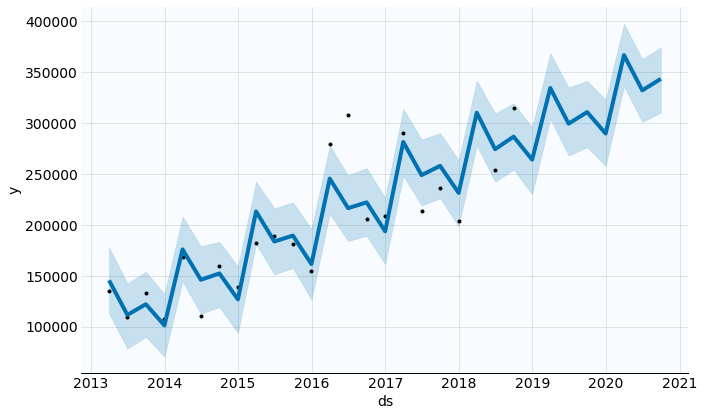

In [54]:
fig1 = m.plot(forecast)

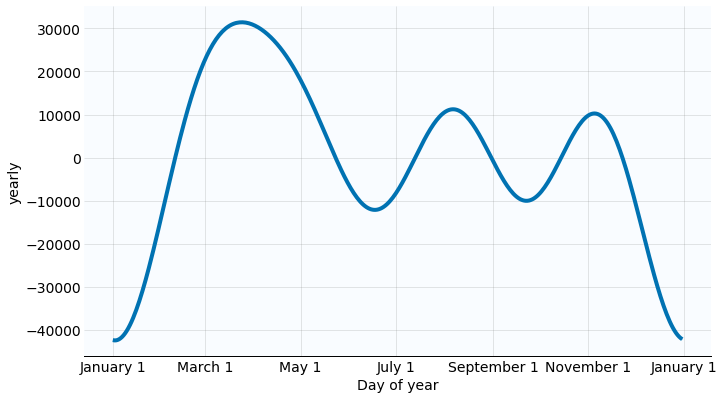

In [55]:
from fbprophet.plot import plot_yearly
b = plot_yearly(m)